#Project Abstract

In this project I will be exploring data provided by the World Health Organization about patients who have or have not had strokes. The dataset contains lots of data about patients such as gender, age, bmi, smoking status, stroke status, etc. I will be analyzing this data to find out which of these factors contribute to the probability of patients having a stroke. I will be looking for which attributes have a strong correlation to patients with strokes, and I will be trying to find what causes people to have strokes.

#Loading the data

In [ ]:
#!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
import json

In [ ]:
token = {"username":"salahzahran","key":"ce647d77f05fdec32dbc7bf3f0ed9d90"} # Remember to change this to your credentials

In [ ]:
with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(token, file)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!kaggle config set -n path -v{/root}

- path is now set to: {/root}


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s Stroke

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
fedesoriano/stroke-prediction-dataset                          Stroke Prediction Dataset                            67KB  2021-01-26 19:29:28          14489  
mazharkarimi/heart-disease-and-stroke-prevention               Heart Disease and Stroke Prevention                   1MB  2018-05-14 10:36:48           7489  
google/tinyquickdraw                                           QuickDraw Sketches                                   11GB  2018-04-18 19:38:04           2922  
valkling/tappy-keystroke-data-with-parkinsons-patients         Tappy Keystroke Data with Parkinson's Patients       96MB  2018-02-04 05:41:47           1013  
mpwolke/cusersmarildownloadsstrokecsv         

In [ ]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset -p /content

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 25.9MB/s]


In [ ]:
!unzip \*.zip

Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


#Analyzing the data

In [ ]:
import pandas as pd
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
import matplotlib.pyplot as plt
import altair as alt
from altair import Chart, X, Y, Color, Scale

In [ ]:
data = pd.DataFrame([df['age'], df['stroke']])
data.shape

(2, 5110)

In [ ]:
males = df[df['gender'] == 'Male']
males.shape

(2115, 12)

In [ ]:
strokes = males['stroke'] == 1
yes = 0
no = 0
for x in strokes:
  if x:
    yes += 1
  else:
    no += 1
yes

108

In [ ]:
yes / males.shape[0] * 100    # percent of males who have strokes

5.106382978723404

In [ ]:
females = df[df['gender'] == 'Female']
females.shape

(2994, 12)

In [ ]:
strokes = females['stroke'] == 1
yes = 0
no = 0
for x in strokes:
  if x:
    yes += 1
  else:
    no += 1
yes

141

In [ ]:
yes / females.shape[0] * 100  # percent of females who have strokes

4.709418837675351

5.1% of male patients have had a stroke, while 4.7% of females have had a stroke
While strokes seem to be a bit more common among males, the difference is too little to call it a deciding factor.

#How many males that did not smoke got a stroke in this data set?

In [ ]:
df.stroke.unique() # Are there people with no stroke in this data set? Yes, since 1 and 0 both appear

array([1, 0])

In [ ]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
a = df[df['smoking_status'] == 'never smoked'] # creates new data set of patients who never smoked,
b = a[a['stroke'] == 1]                         # had a stroke,
c = b[b['gender'] == 'Male']                    # and are male

In [ ]:
c.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
25,70822,Male,80.0,0,0,Yes,Self-employed,Rural,104.12,23.5,never smoked,1
34,14248,Male,48.0,0,0,No,Govt_job,Urban,84.20,29.7,never smoked,1
41,1261,Male,54.0,0,0,Yes,Private,Urban,71.22,28.5,never smoked,1


In [ ]:
c.describe()      # There are 27 patients who fit the above criteria

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,27.000000,27.000000,27.000000,27.000000,27.000000,25.000000,27.0
mean,36801.962963,71.703704,0.370370,0.185185,140.716667,30.264000,1.0
std,20545.985016,10.446990,0.492103,0.395847,68.731346,4.504709,0.0
min,210.000000,45.000000,0.000000,0.000000,60.980000,23.500000,1.0
25%,20131.500000,68.500000,0.000000,0.000000,79.610000,27.100000,1.0
50%,36236.000000,74.000000,0.000000,0.000000,105.920000,29.400000,1.0
75%,52285.000000,79.500000,1.000000,0.000000,212.795000,32.800000,1.0
max,70822.000000,82.000000,1.000000,1.000000,249.310000,42.400000,1.0


# What is the average age of patients who had a stroke?

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
a = df[df['stroke'] == 1] # new ds of patients who had a stroke
a.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
a.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,209.000000,249.0
mean,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292,1.0
std,21993.344872,12.727419,0.442254,0.392102,61.921056,6.329452,0.0
min,210.000000,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17013.000000,59.000000,0.000000,0.000000,79.790000,26.400000,1.0
50%,36706.000000,71.000000,0.000000,0.000000,105.220000,29.700000,1.0
75%,56669.000000,78.000000,1.000000,0.000000,196.710000,33.700000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


In [ ]:
avg_age = a['age'].mean() # calculates mean of the age of dataset
avg_age                    # The avgerage age of patients who had a stroke is 67.

67.72819277108434

#Are strokes more common among smokers or non-smokers?

In [ ]:
a = df[df['stroke'] == 1]             # new data set of patients who have had a stroke
a[a['smoking_status'] == 'smokes'].count()    # find number of stroke patients who smoke as well

id                   42
gender               42
age                  42
hypertension         42
heart_disease        42
ever_married         42
work_type            42
Residence_type       42
avg_glucose_level    42
bmi                  39
smoking_status       42
stroke               42
dtype: int64

In [ ]:
a = df[df['stroke'] == 1]
a[a['smoking_status'] == 'formerly smoked'].count()   # find number of stroke patients who have smoked before

id                   70
gender               70
age                  70
hypertension         70
heart_disease        70
ever_married         70
work_type            70
Residence_type       70
avg_glucose_level    70
bmi                  57
smoking_status       70
stroke               70
dtype: int64

In [ ]:
a = df[df['stroke'] == 1]
a[a['smoking_status'] == 'never smoked'].count()    # find number of stroke patients who have never smoked

id                   90
gender               90
age                  90
hypertension         90
heart_disease        90
ever_married         90
work_type            90
Residence_type       90
avg_glucose_level    90
bmi                  84
smoking_status       90
stroke               90
dtype: int64

#What percent of patients are smokers and have not had a stroke?

In [ ]:
index = df.index
number_of_rows = len(index)

In [ ]:
print(number_of_rows)     # number of entries in the dataset

5110


In [ ]:
a = df[df['smoking_status'] == 'smokes']  # create a new data set of patients who are currently smokers
b = a[a['stroke'] == 0]                   # and have never had a stroke before
percent = b.stroke.count()                # and find the count of these patients
percent

747

In [ ]:
b.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,747.000000,747.000000,747.000000,747.000000,747.000000,698.000000,747.0
mean,36560.717537,46.212851,0.111111,0.061580,106.219906,30.541547,0.0
std,21350.390634,16.176853,0.314480,0.240552,45.526585,7.271794,0.0
min,187.000000,10.000000,0.000000,0.000000,55.320000,15.700000,0.0
25%,18348.500000,32.000000,0.000000,0.000000,76.730000,25.400000,0.0
50%,37154.000000,46.000000,0.000000,0.000000,93.040000,29.100000,0.0
75%,55184.500000,57.000000,0.000000,0.000000,113.305000,34.675000,0.0
max,72911.000000,82.000000,1.000000,1.000000,267.610000,78.000000,0.0


In [ ]:
percent / number_of_rows * 100            # calculate the percent of patients who are smokers and never had a stroke

14.618395303326809

#What is the strongest determining factor for a patient to have a stroke?

In [ ]:
bmi = df['bmi']           # grab the bmi and stroke columns to find a correlation
stroke = df['stroke']

In [ ]:
correlation = bmi.corr(stroke)  # calculate the correlation between bmi & stroke

In [ ]:
print(correlation)    # correlation is 0.042

0.04237366114923359


In [ ]:
correlation_df = df.corr()  # finding correlation between all columns

In [ ]:
print(correlation_df)

                         id       age  ...       bmi    stroke
id                 1.000000  0.003538  ...  0.003084  0.006388
age                0.003538  1.000000  ...  0.333398  0.245257
hypertension       0.003550  0.276398  ...  0.167811  0.127904
heart_disease     -0.001296  0.263796  ...  0.041357  0.134914
avg_glucose_level  0.001092  0.238171  ...  0.175502  0.131945
bmi                0.003084  0.333398  ...  1.000000  0.042374
stroke             0.006388  0.245257  ...  0.042374  1.000000

[7 rows x 7 columns]


In [ ]:
df_corr = pd.DataFrame(correlation_df, columns=['bmi', 'stroke']) # data frame with correlation values
df_corr

,bmi,stroke
id,0.003084,0.006388
age,0.333398,0.245257
hypertension,0.167811,0.127904
heart_disease,0.041357,0.134914
avg_glucose_level,0.175502,0.131945
bmi,1.000000,0.042374
stroke,0.042374,1.000000


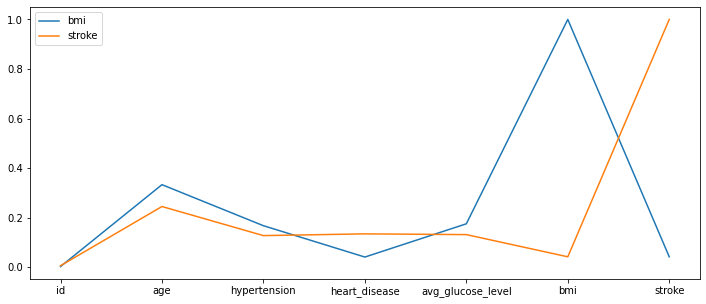

In [ ]:
df_corr.plot(figsize=(12, 5))
plt.show()

In [ ]:
df_chart = pd.DataFrame(df, columns=['bmi', 'stroke'])
df_chart.tail(10)

,bmi,stroke
5100,28.3,0
5101,24.5,0
5102,21.7,0
5103,46.9,0
5104,18.6,0
5105,NaN,0
5106,40.0,0
5107,30.6,0
5108,25.6,0
5109,26.2,0


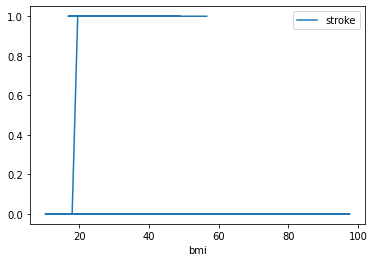

In [ ]:
df.plot(x='bmi', y='stroke', kind='line') # The chart shows that patients are only likely to have a stroke with a bmi of 60 or below
plt.show()                                # However, not all patients who fit this criteria will definitely have a stroke

In [ ]:
bmi = df['age']           # grab the age and stroke columns to find a correlation
stroke = df['stroke']

In [ ]:
correlation = bmi.corr(stroke) # age correlation to stroke is 0.245
print(correlation)

0.24525734617097447


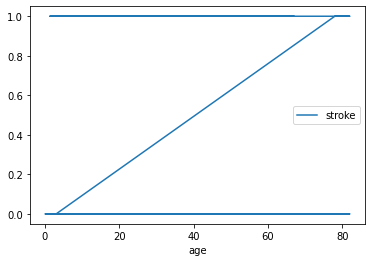

In [ ]:
df.plot(x='age', y='stroke', kind='line')
plt.show()

##Report

According to the data that I collected, I confirmed that there is not a strong correlation between characteristics like gender, bmi, smoking status, etc and patients with strokes. There are some patterns that occur among patients who have had strokes, though it is not decisive data. I found that there is a strong positive correlation between age and strokes. This means that the main factor that affects strokes is age, and the older an individual the more likely he or she is to have a stroke. Patients who have a bmi of 60 or below are also almost guaranteed to have had a stroke.

Questions
#How many males that did not smoke got a stroke in this data set?          (27)
#What is the average age of patients who have had a stroke?                (67)
#Are strokes more common among smokers or non-smokers?            (non-smokers)
#What percent of patients are smokers and have not had a stroke?        (14.6%)
#What is the strongest determining factor for a patient to have a stroke? (age)
